In [1]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro,probplot
from statsmodels.stats.power import ttest_power
from statsmodels.graphics.gofplots import qqplot
import plotly.express as px


## Problem 1

In [2]:
df = pd.read_csv('Wholesale+Customers+Data.csv')

In [3]:
#Checking top 5 rows

df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
# Check for missing value in any colum
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [5]:
df.drop(['Buyer/Spender'], axis = 1, inplace = True) 
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [6]:
df['Total']= df['Fresh'] + df['Milk'] + df['Grocery'] + df['Frozen'] + df['Detergents_Paper'] + df['Delicatessen']
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100


### Q 1.1. Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

In [66]:
df.groupby(['Channel','Region'])['Total'].sum()

Channel  Region
Hotel    Lisbon    1538342
         Oporto     719150
         Other     5742077
Retail   Lisbon     848471
         Oporto     835938
         Other     4935522
Name: Total, dtype: int64

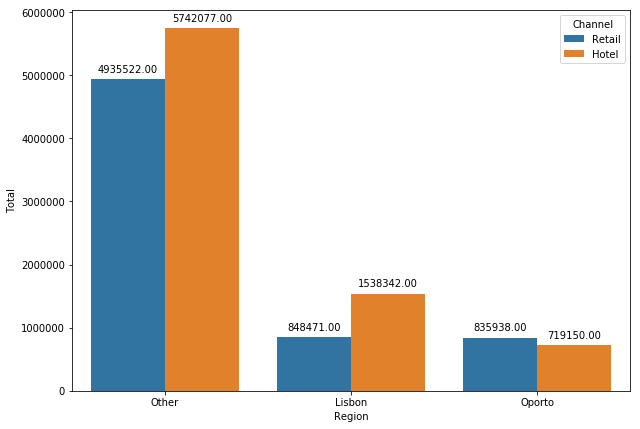

In [74]:
plt.figure(figsize=(10, 7))
splot = sns.barplot(data=df, x = 'Region', y = 'Total', hue = 'Channel',estimator = sum, ci = None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#### From above matrix and graph we can conclude that Hotel of "Other" region spend the most and Hotel of "Oporto" region spend the least.

### Q 1.2. There are 6 different varieties of items.Do all varieties show similar behaviour across Region and Channel?

C:\Users\Monika\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



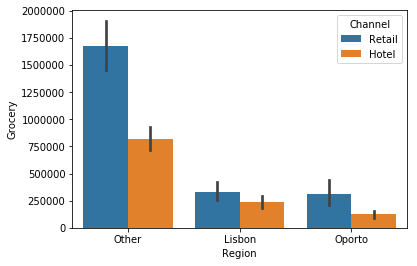

In [10]:
sns.barplot(x= 'Region', y= 'Grocery', hue ='Channel', data = df, estimator = sum)

C:\Users\Monika\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



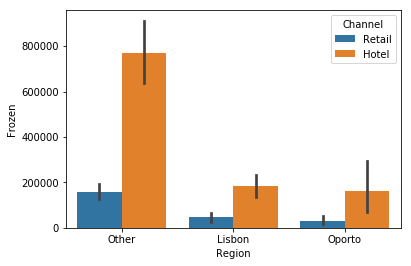

In [11]:
sns.barplot(x= 'Region', y= 'Frozen', hue ='Channel', data = df, estimator = sum)

C:\Users\Monika\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



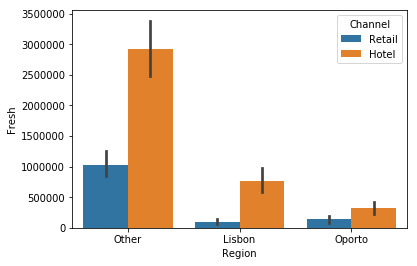

In [12]:
sns.barplot(x= 'Region', y= 'Fresh', hue ='Channel', data = df, estimator = sum)

C:\Users\Monika\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



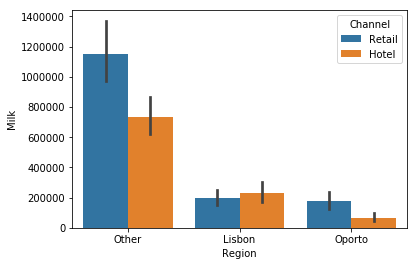

In [13]:
sns.barplot(x= 'Region', y= 'Milk', hue ='Channel', data = df, estimator = sum)

C:\Users\Monika\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



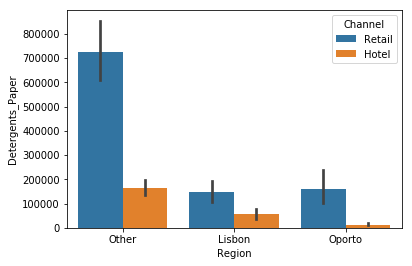

In [14]:
sns.barplot(x= 'Region', y= 'Detergents_Paper', hue ='Channel', data = df, estimator = sum)

C:\Users\Monika\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



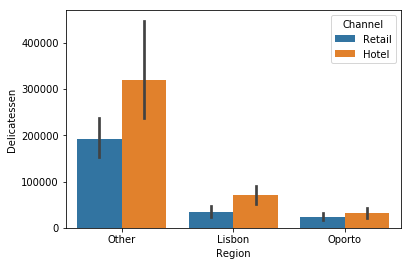

In [15]:
sns.barplot(x= 'Region', y= 'Delicatessen', hue ='Channel', data = df, estimator = sum)

In [16]:
df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


#### Looking at the above summary statistics we can confirm that the six varieties do not show similar behaviour as the mean and standard deviation values are very different from each other.

Also, each variety shows similar "spending" across and Channel except  “Milk” as the spend on Milk is more for “Retail” in Other and Oporto Region but it is more for “Hotel”  for Lisbon Region. 


### Q 1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour? Which items shows the least inconsistent behaviour?

In [17]:
df.drop(['Total'], axis =1).std().sort_values(ascending = False)

Fresh               12647.328865
Grocery              9503.162829
Milk                 7380.377175
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

#### On the basis of Standard Deviation,  “Fresh” shows the most and “Delicatessen” shows the least inconsistent behaviour

### Q 1.4 Are there any outliers in the data?

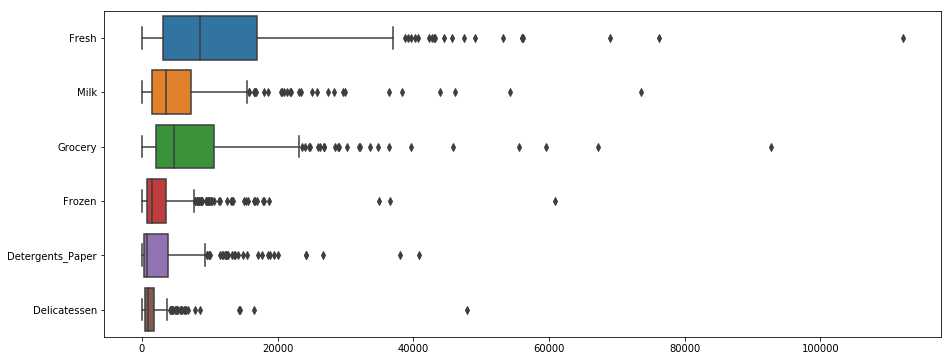

In [18]:
plt.figure(figsize = (15,6))
df2 = df.copy()
df2.drop(['Total'], axis = 1, inplace = True)
sns.boxplot(data=df2, orient="h")

#### Yes, the above representation confirms that all items have outliers present.

### Q 1.5. On the basis of this report, what are the recommendations?

As per the report, we can conclude that the data given is not consistent and no inference should be made for Business solutions looking at this data, as this report is just stating the spending region and channel wise. 

To conclude on a business solution, we would be needing more details about the problem statement for which the data as gathered

This data set has outliers present which should be removed initially and then the standard deviation should be checked, if still inconsistency is present we should collect more data with other parameters like month to make better deductions of spending pattern.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F910218FD0>,
      dtype=object)

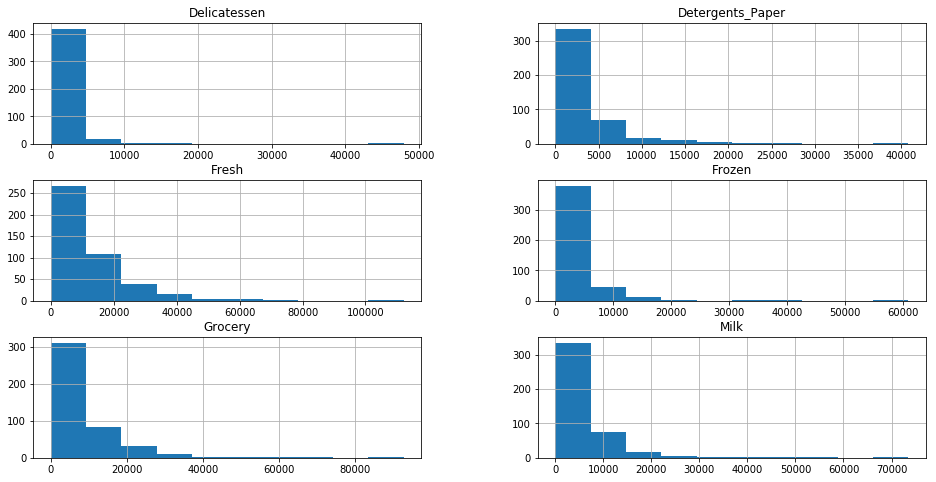

In [19]:
df2.hist(figsize=(16,8))

# Problem 2

In [20]:
p2 = pd.read_csv('Survey.csv')

In [21]:
p2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [22]:
p2.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [23]:
p2.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,62.0,31.500000,18.041619,1.0,16.25,31.50,46.75,62.0
Age,62.0,21.129032,1.431311,18.0,20.00,21.00,22.00,26.0
GPA,62.0,3.129032,0.377388,2.3,2.90,3.15,3.40,3.9
Salary,62.0,48.548387,12.080912,25.0,40.00,50.00,55.00,80.0
Social Networking,62.0,1.516129,0.844305,0.0,1.00,1.00,2.00,4.0
Satisfaction,62.0,3.741935,1.213793,1.0,3.00,4.00,4.00,6.0
Spending,62.0,482.016129,221.953805,100.0,312.50,500.00,600.00,1400.0
Text Messages,62.0,246.209677,214.465950,0.0,100.00,200.00,300.00,900.0


### Contingency Tables

### Q 2.1.1. Gender and Major

In [24]:
major  = pd.crosstab(p2.Gender, p2.Major,  
                              margins = False) 
major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


### Q 2.1.2. Gender and Grad Intention

In [25]:
grad  = pd.crosstab(p2['Gender'], p2['Grad Intention'],  
                              margins = False) 
grad

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


### Q 2.1.3. Gender and Employment

In [26]:
emp  = pd.crosstab(p2['Gender'], p2['Employment'],  
                              margins = False) 
emp

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


### Q 2.1.4. Gender and Computer

In [27]:
comp  = pd.crosstab(p2['Gender'], p2['Computer'],  
                              margins = False) 
comp

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


### Q 2.2.1 What is the probability that a randomly selected CMSU student will be male?

In [28]:
male = p2[p2['Gender'] == 'Male']['Gender'].count()
male

29

In [29]:
total = p2['Gender'].count()
total

62

In [30]:
print( 'Probability that a randomly selected CMSU student will be a male: ' + str(male/total))

Probability that a randomly selected CMSU student will be a male: 0.46774193548387094


In [31]:
female = p2[p2['Gender'] == 'Female']['Gender'].count()
female

33

### Q 2.2.1 What is the probability that a randomly selected CMSU student will be female?

In [32]:
print( 'Probability that a randomly selected CMSU student will be a Female: ' + str(female/total))

Probability that a randomly selected CMSU student will be a Female: 0.532258064516129


### Q 2.2.2. Find the conditional probability of different majors among the male students in CMSU. Also, find the conditional probability of different majors among the female students of CMSU

In [33]:
gender = p2.groupby('Gender').size().div(len(p2))
gender

Gender
Female    0.532258
Male      0.467742
dtype: float64

In [34]:
p2.groupby(['Major', 'Gender']).size().div(len(p2)).div(gender, axis=0, level='Gender')

Major                   Gender
Accounting              Female    0.090909
                        Male      0.137931
CIS                     Female    0.090909
                        Male      0.034483
Economics/Finance       Female    0.212121
                        Male      0.137931
International Business  Female    0.121212
                        Male      0.068966
Management              Female    0.121212
                        Male      0.206897
Other                   Female    0.090909
                        Male      0.137931
Retailing/Marketing     Female    0.272727
                        Male      0.172414
Undecided               Male      0.103448
dtype: float64

### Q 2.2.3.  Find the conditional probability of intent to graduate, given that the student is a male. Also, find the conditional probability of intent to graduate, given that the student is a female.

In [35]:
p2.groupby(['Grad Intention', 'Gender']).size().div(len(p2)).div(gender, axis=0, level='Gender')

Grad Intention  Gender
No              Female    0.272727
                Male      0.103448
Undecided       Female    0.393939
                Male      0.310345
Yes             Female    0.333333
                Male      0.586207
dtype: float64

In [36]:
p2[p2['Grad Intention'] == 'Yes'].groupby(['Grad Intention', 'Gender']).size().div(len(p2)).div(gender, axis=0, level='Gender')

Grad Intention  Gender
Yes             Female    0.333333
                Male      0.586207
dtype: float64

### Q 2.2.4 Find the conditional probability of employment status for the male students as well as for the female students.

In [37]:
p2.groupby(['Employment', 'Gender']).size().div(len(p2)).div(gender, axis=0, level='Gender')

Employment  Gender
Full-Time   Female    0.090909
            Male      0.241379
Part-Time   Female    0.727273
            Male      0.655172
Unemployed  Female    0.181818
            Male      0.103448
dtype: float64

### Q 2.2.5 Find the conditional probability of laptop preference among the male students as well as among the female students.

In [38]:
p2[p2['Computer'] == 'Laptop'].groupby(['Computer', 'Gender']).size().div(len(p2)).div(gender, axis=0, level='Gender')

Computer  Gender
Laptop    Female    0.878788
          Male      0.896552
dtype: float64

### Q 2.3. Based on the above probabilities, do you think that the column variable in each case is independent of Gender?Justify your comment in each case.

Major : Major is not independent of gender as the probability of choosing a course is different for Male and Female. For instance, it can be seen that Female are equally likely to choose Accounting and CIS whereas Male are more likely to choose Accounting over CIS.

Grad Intention : From the conditional probabilities calculated, we can see that Male have higher intentions of graduation than female. Hence, we can say that Grad Intention is not independent of Gender. 

Employment : This column variable is also not independent of gender as we can see that the probabilities are different for male and female. For instance, Male have higher probability of Full time employment over female and female have better part-time employment rate than male.  

Laptop Preference : In this case P(Laptop) = 88.7%, P(Laptop | Male) = 89.6% and P(Laptop | Female)  = 87.8% In both cases, the probability is very high but we still cannot say that the probability is independent of Gender as the two probabilities are not exactly same.


### Q 2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F9109BD198>,
      dtype=object)

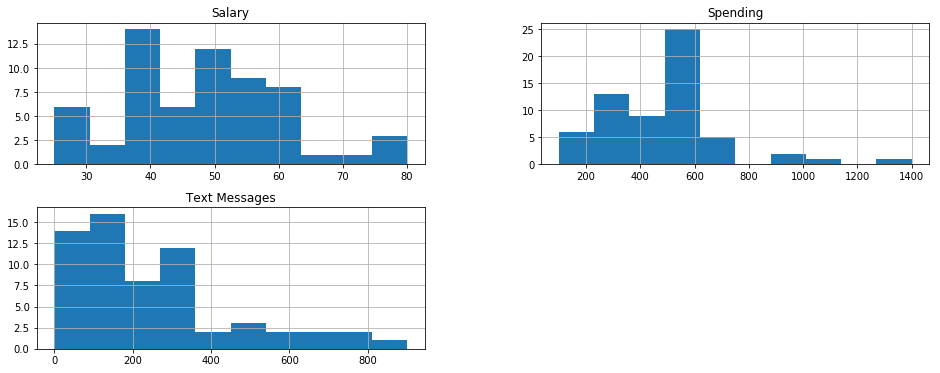

In [39]:
p2[['Salary','Spending','Text Messages']].hist(figsize = (16,6))

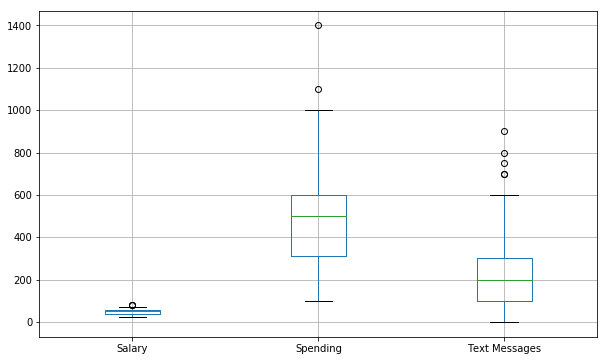

In [40]:
p2[['Salary','Spending','Text Messages']].boxplot(figsize = (10,6))

#### Test for Normality

In [41]:
stats.shapiro(p2['Salary'])

(0.9565856456756592, 0.028000956401228905)

Since p-value : 0.028 < 0.05, we reject the Null Hypothesis that Salary is Normally Distributed

In [42]:
stats.shapiro(p2['Spending'])

(0.8777452111244202, 1.6854661225806922e-05)

Since p-value 1.68e-05 < 0.05, we reject the Null Hypothesis that Spending is Normally Distributed. Therefore, we can say that Spending does not follow a Normal Distribution.

In [43]:
stats.shapiro(p2['Text Messages'])

(0.8594191074371338, 4.324040673964191e-06)

Since p-value 4.324040673964191e-06 < 0.05, we reject the Null Hypothesis that Text Messages is Normally Distributed. Therefore, we can say that Text Messages does not follow a Normal Distribution

# Problem 3 

In [44]:
a = pd.read_csv("A+&+B+shingles.csv", usecols = ['A'])
b = pd.read_csv("A+&+B+shingles.csv", usecols = ['B'])

In [45]:
b.dropna(inplace = True)

### Q 3.1. For the A shingles, form the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet.

Null Hypothesis : Mean >= 0.35 pound  per 100 square feet

Alternate Hypothesis :  Mean < 0.35 pound  per 100 square feet

### 3.2. For the A shingles, conduct the test of hypothesis and find the p-value.Interpret the p-value.Is there evidence at the 0.05 level of significance that the population mean moisture content is less than 0.35 pound per 100 square feet?


In [46]:
# one sample t-test
# null hypothesis: expected value >= 0.35
# Alternate Hypothesis : expected value < 0.35

t_stat, p_val = ttest_1samp(a, 0.35)
print(t_stat,p_val)

[-1.47350463] [0.14955266]


Since p_value : 0.14955266289815025 > 0.05, we fail to reject the Null Hypothesis. Therefore, for A shingles population mean moisture content is not less than 0.35 pound per 100 square feet

### Q 3.3. For the B shingles, form the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet.
Null Hypothesis : Mean >= 0.35 pound  per 100 square feet

Alternate Hypothesis :  Mean < 0.35 pound  per 100 square feet


### Q 3.4. For the B shingles, conduct the test of the hypothesis and find the p-value. Interpret the p-value. Is there evidence at the 0.05 level of significance that the population mean moisture content is less than 0.35 pound per 100 square feet?

In [47]:
# one sample t-test
# null hypothesis: expected value >= 0.35
# Alternate Hypothesis : expected value < 0.35

t_stat, p_val = ttest_1samp(b, 0.35)
print(t_stat,p_val)

[-3.10033131] [0.00418095]


Since p_value : 0.00418095 < 0.05, we reject the Null Hypothesis. Therefore, for B shingles population mean moisture content is less than 0.35 pound per 100 square feet

### Q 3.5. Do you think that the population means for shingles A and B are equal?Form the hypothesis and conduct the test of the hypothesis.What assumption do you need to check before the test for equality of means is performed?

In [48]:
# two-sample t-test
# null hypothesis: the two groups have the same mean
# this test assumes the two groups have the same variance...
# (can be checked with tests for equal variance - Levene)

# Test for equal variance
w_statistic, p_value = levene(a, b)
print(w_statistic, p_value)

[0.23808965] [0.62723121]


Since p-value 0.62723121 > 0.05, we fail to reject the Null Hpothesis. Therefore, we can conclude that two samples have equal variance

In [49]:
t_statistic, p_value = ttest_ind(a, b)
print(t_statistic, p_value)

[1.28962827] [0.20174966]


Since p_value : 0.20174966 > 0.05, we fail to reject the Null Hypothesis. Therefore, population means for shingles A and B are equal

### Q 3.6. What assumption about the population distribution is needed in order to conduct the hypothesis tests above?
The populations (where the samples come from) follow the Normal Distribution 

### 3.7. Check the assumptions made with histograms, boxplots, normal probability plots or empirical rule.

C:\Users\Monika\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



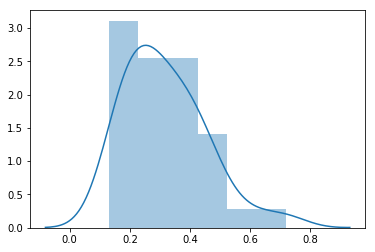

In [50]:
sns.distplot(a)

C:\Users\Monika\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



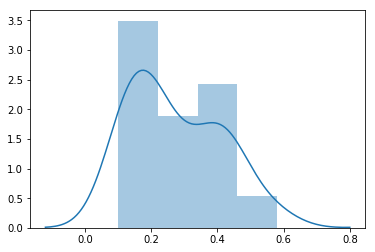

In [51]:
sns.distplot(b)

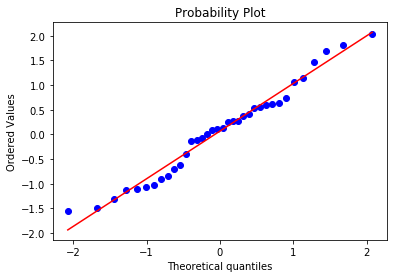

In [52]:
x = stats.norm.rvs(loc=0, scale=1, size=a.size)
res = stats.probplot(x, plot=plt)

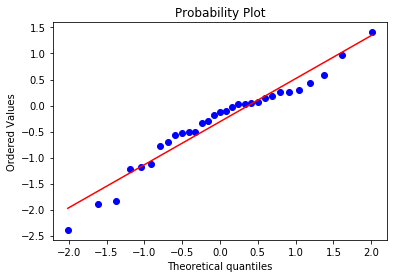

In [53]:
x = stats.norm.rvs(loc=0, scale=1, size=b.size)
res = stats.probplot(x, plot=plt)

### Q 3.8. Do you think that the assumption needed in order to conduct the hypothesis tests above is valid? Explain.

In [54]:
# Test for Normality
shapiro(a)

(0.9375598430633545, 0.042670514434576035)

In [55]:
shapiro(b)

(0.9172994494438171, 0.02002784051001072)

Assumption 1 : Normal Distribution : For both the cases p-value < 0.05, therefore we reject the hypothesis that the sample is Normally Distributed. But since our data set is large enough (>30) to apply parametric test although the normality criterion is violated, we can safely go ahead with our assumption and perform the test.

In [56]:
mannwhitneyu(a,b)

MannwhitneyuResult(statistic=451.0, pvalue=0.09013338414358146)

Assumption 2 : Equal Variance : After Levene Test, p-value 0.62723121 > 0.05, we fail to reject the Null Hpothesis. Therefore, we can conclude that two samples have equal variance. This assumption is valid.
